# Summary

- Extract BTC data using coincap api
- Select required data and change to appropriate datatype
- Export data to csv file 

In [1]:
# import libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ASUS\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# extract data using coincap api
url = "http://api.coincap.io/v2/assets/bitcoin/history?interval=d1"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
json_data = json.loads(response.text.encode('utf8'))

In [3]:
json_data

{'data': [{'priceUsd': '44897.1850005100374964',
   'time': 1628467200000,
   'date': '2021-08-09T00:00:00.000Z'},
  {'priceUsd': '45618.6383947476633757',
   'time': 1628553600000,
   'date': '2021-08-10T00:00:00.000Z'},
  {'priceUsd': '46114.1647574024931172',
   'time': 1628640000000,
   'date': '2021-08-11T00:00:00.000Z'},
  {'priceUsd': '44994.6119807435163660',
   'time': 1628726400000,
   'date': '2021-08-12T00:00:00.000Z'},
  {'priceUsd': '46218.1832672041029160',
   'time': 1628812800000,
   'date': '2021-08-13T00:00:00.000Z'},
  {'priceUsd': '47136.3206777399330848',
   'time': 1628899200000,
   'date': '2021-08-14T00:00:00.000Z'},
  {'priceUsd': '46448.7625666826190392',
   'time': 1628985600000,
   'date': '2021-08-15T00:00:00.000Z'},
  {'priceUsd': '46953.4801316103380567',
   'time': 1629072000000,
   'date': '2021-08-16T00:00:00.000Z'},
  {'priceUsd': '45986.5228431102022226',
   'time': 1629158400000,
   'date': '2021-08-17T00:00:00.000Z'},
  {'priceUsd': '45154.6886697

In [4]:
btc = json_data['data']

In [5]:
btc

[{'priceUsd': '44897.1850005100374964',
  'time': 1628467200000,
  'date': '2021-08-09T00:00:00.000Z'},
 {'priceUsd': '45618.6383947476633757',
  'time': 1628553600000,
  'date': '2021-08-10T00:00:00.000Z'},
 {'priceUsd': '46114.1647574024931172',
  'time': 1628640000000,
  'date': '2021-08-11T00:00:00.000Z'},
 {'priceUsd': '44994.6119807435163660',
  'time': 1628726400000,
  'date': '2021-08-12T00:00:00.000Z'},
 {'priceUsd': '46218.1832672041029160',
  'time': 1628812800000,
  'date': '2021-08-13T00:00:00.000Z'},
 {'priceUsd': '47136.3206777399330848',
  'time': 1628899200000,
  'date': '2021-08-14T00:00:00.000Z'},
 {'priceUsd': '46448.7625666826190392',
  'time': 1628985600000,
  'date': '2021-08-15T00:00:00.000Z'},
 {'priceUsd': '46953.4801316103380567',
  'time': 1629072000000,
  'date': '2021-08-16T00:00:00.000Z'},
 {'priceUsd': '45986.5228431102022226',
  'time': 1629158400000,
  'date': '2021-08-17T00:00:00.000Z'},
 {'priceUsd': '45154.6886697612712484',
  'time': 1629244800000,

In [6]:
df = pd.DataFrame(btc)
df = df[['date', 'priceUsd']]
df

,date,priceUsd
0,2021-08-09T00:00:00.000Z,44897.1850005100374964
1,2021-08-10T00:00:00.000Z,45618.6383947476633757
2,2021-08-11T00:00:00.000Z,46114.1647574024931172
3,2021-08-12T00:00:00.000Z,44994.6119807435163660
4,2021-08-13T00:00:00.000Z,46218.1832672041029160
...,...,...
358,2022-08-03T00:00:00.000Z,23179.5672095090450380
359,2022-08-04T00:00:00.000Z,22858.4117117615296512
360,2022-08-05T00:00:00.000Z,23070.4866937298458687
361,2022-08-06T00:00:00.000Z,23186.3250686722211144


In [7]:
# check for datatype and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      363 non-null    object
 1   priceUsd  363 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [8]:
# change datatype
df['priceUsd'] = pd.to_numeric(df['priceUsd'])
df['date'] = pd.to_datetime(df.date).dt.tz_localize(None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      363 non-null    datetime64[ns]
 1   priceUsd  363 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


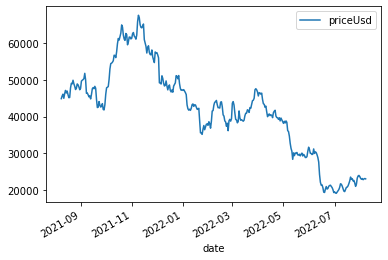

In [10]:
df.plot(x='date',y='priceUsd',kind='line')
plt.show()

In [11]:
# rename to ds and y as required by fbprophet
df = df.rename(columns={"date": "ds", "priceUsd": "y"})
df.head()

,ds,y
0,2021-08-09,44897.185001
1,2021-08-10,45618.638395
2,2021-08-11,46114.164757
3,2021-08-12,44994.611981
4,2021-08-13,46218.183267


In [12]:
# select last 30 days as testing data
train = df[:-30]
test = df[len(df)-30:]

In [13]:
# export data
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)